## Ejercicio Inferencia (A/B test)

**Una tienda en línea quiere analizar si un nuevo proceso de checkout aumenta el uso de cupones de descuento. Para ello, realizó un test A/B donde los clientes fueron asignados aleatoriamente a dos grupos:**
- Grupo A (checkout tradicional): 500 clientes.
  - 130 de ellos usaron un cupón de descuento
- Grupo B (nuevo checkout): 500 clientes.
  - 175 de ellos usaron un cupón de descuento
**Tiene el nuevo proceso de checkout un impacto significativo en el uso de cupones? Porqué?**

## Respuesta

### Resultados del Test A/B

1. **Proporciones observadas:**
   - Grupo A (checkout tradicional): $p_A = 0.26$ (26%).
   - Grupo B (nuevo checkout): $p_B = 0.35$ (35%).

2. **Proporción conjunta $\hat{p}$:**
   $$
   \hat{p} = 0.305
   $$

3. **Estadístico $z$:**
   $$
   z = -3.09
   $$

4. **P-valor:**
   $$
   p\text{-valor} = 0.002
   $$

5. **Umbral crítico (con $\alpha = 0.05$):**
   $$
   z_{\text{crítico}} = \pm 1.96
   $$

### Conclusión:

Dado que $z = -3.09$ está fuera del rango crítico $( -1.96 \leq z \leq 1.96$) y el $p$-valor es menor que 0.05 $( p\text{-valor} = 0.002 $), rechazamos la hipótesis nula $H_0$.

**Interpretación:** El nuevo proceso de checkout tiene un efecto significativo en el uso de cupones.

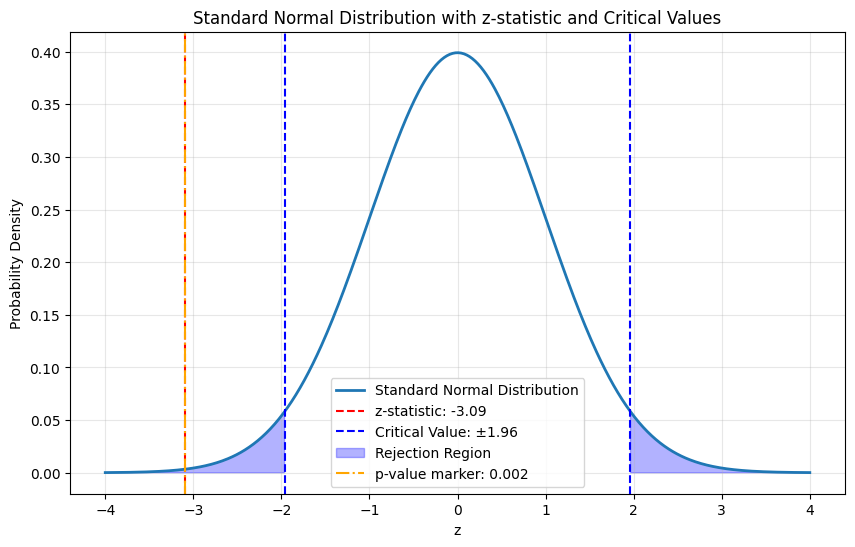

Results of the A/B Test:
Proportion in Group A: 0.26
Proportion in Group B: 0.35
Combined Proportion: 0.30
z-statistic: -3.09
p-value: 0.00200
Critical Value (z): ±1.96


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data from the experiment
n_A = 500  # Group A sample size
x_A = 130  # Successes in Group A
p_A = x_A / n_A  # Proportion of successes in Group A

n_B = 500  # Group B sample size
x_B = 175  # Successes in Group B
p_B = x_B / n_B  # Proportion of successes in Group B

# Combined proportion
p_hat = (x_A + x_B) / (n_A + n_B)

# Standard error
SE = (p_hat * (1 - p_hat) * (1 / n_A + 1 / n_B)) ** 0.5

# z-statistic
z = (p_A - p_B) / SE

# p-value (two-tailed test)
p_value = 2 * (1 - norm.cdf(abs(z)))

# Critical value for alpha = 0.05
alpha = 0.05
z_critical = norm.ppf(1 - alpha / 2)

# Visualization
x = np.linspace(-4, 4, 500)
y = norm.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Distribution", lw=2)

# z-statistic line
plt.axvline(z, color="red", linestyle="--", label=f"z-statistic: {z:.2f}")

# Critical threshold lines
plt.axvline(z_critical, color="blue", linestyle="--", label=f"Critical Value: ±{z_critical:.2f}")
plt.axvline(-z_critical, color="blue", linestyle="--")

# Highlight rejection region
plt.fill_between(x, y, where=(x <= -z_critical) | (x >= z_critical), color="blue", alpha=0.3, label="Rejection Region")

# p-value marker
plt.axvline(-abs(z), color="orange", linestyle="-.", label=f"p-value marker: {p_value:.3f}")

# Labels and legend
plt.title("Standard Normal Distribution with z-statistic and Critical Values")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Results
print("Results of the A/B Test:")
print(f"Proportion in Group A: {p_A:.2f}")
print(f"Proportion in Group B: {p_B:.2f}")
print(f"Combined Proportion: {p_hat:.2f}")
print(f"z-statistic: {z:.2f}")
print(f"p-value: {p_value:.5f}")
print(f"Critical Value (z): ±{z_critical:.2f}")